In [51]:
# チャートを日本語で表示
import japanize_matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font='IPAexGothic')
japanize_matplotlib.japanize()


In [52]:
df = pd.read_csv('doraeiga.csv')
df.head()


,タイトル,配給収入,興行収入,観客動員数,年度
0,のび太の恐竜,15.5,NaN,320.0,1980
1,のび太の宇宙開拓史,17.5,NaN,360.0,1981
2,のび太の大魔境,12.2,NaN,250.0,1982
3,のび太の海底鬼岩城,10.0,NaN,210.0,1983
4,のび太の魔界大冒険,16.5,NaN,330.0,1984


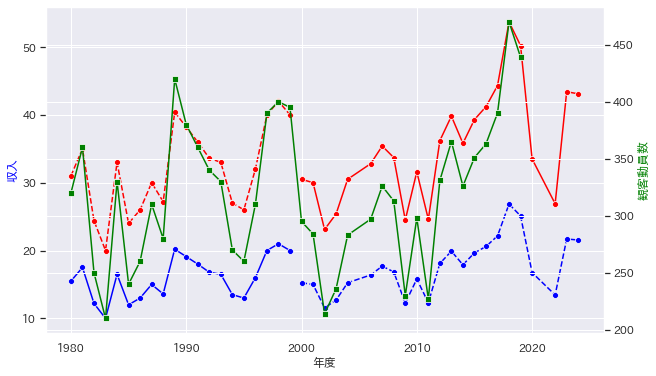

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 配給収入と興行収入を仮に算出
df["配給収入_補正"] = df["配給収入"] * 2
df["興行収入_補正"] = df["興行収入"] / 2

# Plot the primary y-axis data
sns.lineplot(data=df, x="年度", y="配給収入", ax=ax1, color="blue", marker="o")
sns.lineplot(data=df, x="年度", y="配給収入_補正", ax=ax1, color="red", marker="o", linestyle='--')

sns.lineplot(data=df, x="年度", y="興行収入", ax=ax1, color="red", marker="o")
sns.lineplot(data=df, x="年度", y="興行収入_補正", ax=ax1, color="blue", marker="o", linestyle='--')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x="年度", y="観客動員数", ax=ax2, color="green", marker="s")
ax1.set_ylabel('収入', color='blue')
ax2.set_ylabel('観客動員数', color='green')

sns.set_theme(font='IPAexGothic')
japanize_matplotlib.japanize()
plt.show()

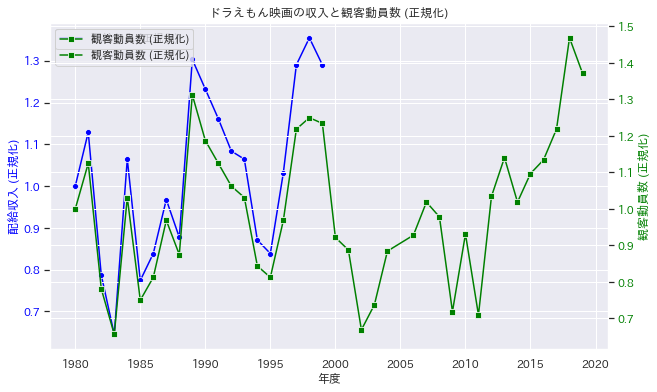

In [58]:
# 正規化
df["配給収入_norm"] = df["配給収入"] / df["配給収入"].iloc[0]
df["観客動員数_norm"] = df["観客動員数"] / df["観客動員数"].iloc[0]

# プロット
fig, ax1 = plt.subplots(figsize=(10, 6))

# 収入の描画 (青色軸)
sns.lineplot(data=df, x="年度", y="配給収入_norm", ax=ax1, color="blue", marker="o", label="配給収入 (正規化)")
ax1.set_ylabel("配給収入 (正規化)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 観客動員数の描画 (緑色軸)
ax2 = ax1.twinx()
sns.lineplot(data=df, x="年度", y="観客動員数_norm", ax=ax2, color="green", marker="s", label="観客動員数 (正規化)")
ax2.set_ylabel("観客動員数 (正規化)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# タイトルと凡例
ax1.set_title("ドラえもん映画の収入と観客動員数 (正規化)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()